In [3]:
!pip install numpy
!pip install matplotlib
!pip install obspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.31
    Uninstalling SQLAlchemy-2.0.31:
      Successfully uninstalled SQLAlchemy-2.0.31
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


## Importing required libreries  
Anotaciones por Andrés Riveros a partir de aqui, archivo original enviado por el docente Elias Buitrago Bolivar

In [2]:

import obspy
import obspy.signal

import numpy as np
import matplotlib.pyplot as plt

## Reading Leyendo datos

**LECTURA DE UN ARCHIVO MSEED = KMI..C01..2023182_010000**

En este archivo podemos observar que:

In [ ]:
st = obspy.read("/content/KMI..C01..2023182_001135.mseed")
# obspy.read("https://github.com/obspy/docs/blob/master/workshops/2016-06-24_cig/ObsPy/data/example.mseed?raw=true")

In [ ]:
print(st)


1 Trace(s) in Stream:
.KMI..C01 | 2023-07-01T00:11:35.000000Z - 2023-07-01T00:59:59.995000Z | 200.0 Hz, 581000 samples


Descripción del archivo, el archivo corresponde a una muestra de 720000 samples, entre el mismo dia, 1 de julio de 2023, y ademas entre las 01 horas y las 02 horas, podria ser entre la 1 de la mañana de ese dia y las 2 de la mañana de ese día, podemos verlo en los datos almacenados asi:

Duranción total del registro = Numero total de registros/frecuencia de muestreo

Duración total = 720000/200=3600 segundos o una hora



Trazas

El archivo está organizado por metadatos, y varias comlumnas, cada columna se llama traza y corresponde a un valor arrojado por el sensor en el periodo de tiempo señalado

## Plotting muestra un gráfico de velocidad

Mientras que los demás muestran un grafico amplitud fase

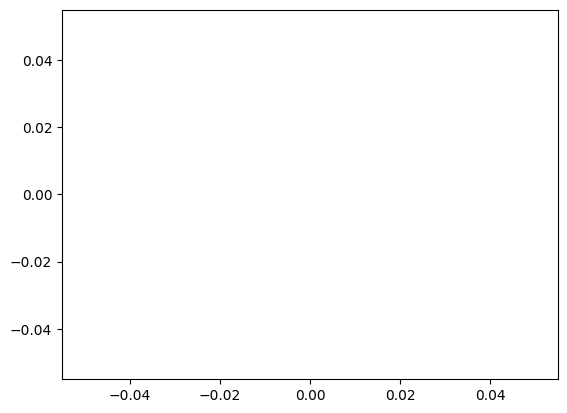

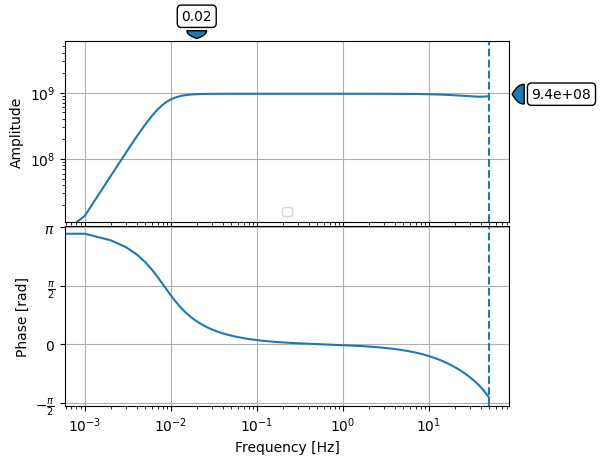

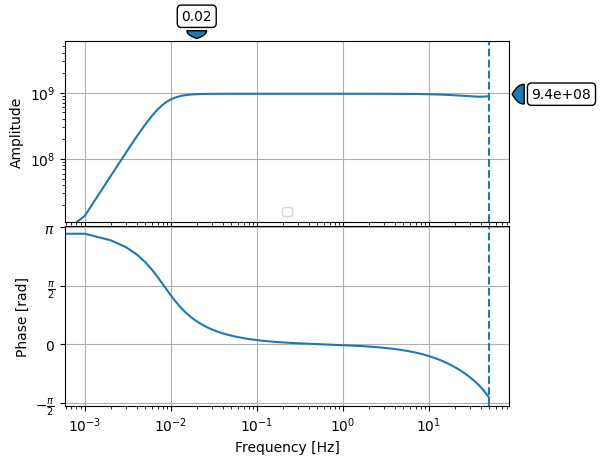

In [ ]:
plt.plot()
from obspy import read_inventory
cha = read_inventory()[0][0][0]
cha.plot(0.001, output="VEL")

## Spectrogram

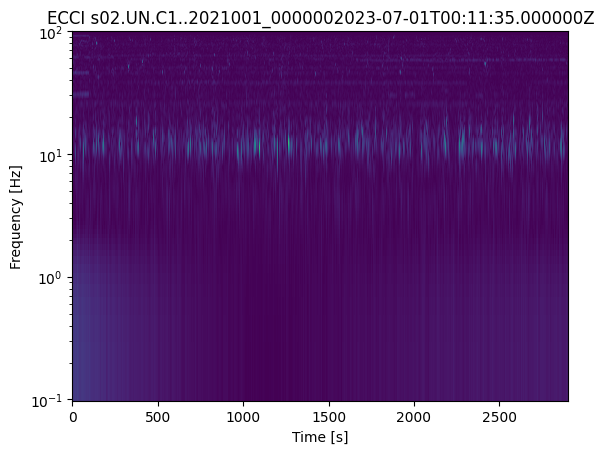

[None]

In [ ]:
st.spectrogram(log=True, title='ECCI s02.UN.C1..2021001_000000' + str(st[0].stats.starttime))

## Filtering filtra la señal en un pasabajas a una frecuencia 0.001

In [ ]:
# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

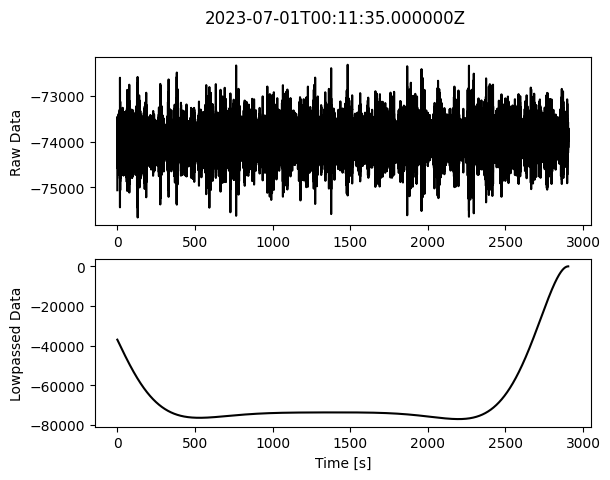

In [ ]:
# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.001, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

## Merging

In [ ]:
(path + "/KMI..C01..2023182" + str(k) + "_0" + str(i) + "0000.mseed")


NameError: name 'path' is not defined

In [ ]:
obspy.read(path + "/s02.UN.C1..202100" + str(k) + "_0" + str(i) + "0000.mseed")

In [ ]:
file = (path + "/s02.UN.C1..202100" + str(k) + "_" + str(j) + "0000.mseed")
print(file)
obspy.read(file)

In [ ]:
#Read C1 data from directories '\data\DatosSabogal\data\2021\2021001' to \data\DatosSabogal\data\2021\2021009'
st2 = obspy.read("data/DatosSabogal/data/2021/2021001/s02.UN.C1..2021001_000000.mseed")
for k in range(1,10):
    path = ("data/DatosSabogal/data/2021/202100" + str(k))
    print("Reading C1 data from directory:")
    print(path)
    if k == 1:
        for i in range(1,10):
            # print("i = " + str(i))
            file = (path + "/s02.UN.C1..202100" + str(k) + "_0" + str(i) + "0000.mseed")
            st2 += obspy.read(file)
        for j in range(10,24):
            # print("j = " + str(j))
            file = (path + "/s02.UN.C1..202100" + str(k) + "_" + str(j) + "0000.mseed")
            st2 += obspy.read(file)
    else:
        for i in range(0,10):
            # print("i = " + str(i))
            file = (path + "/s02.UN.C1..202100" + str(k) + "_0" + str(i) + "0000.mseed")
            st2 += obspy.read(file)
        for j in range(10,24):
            # print("j = " + str(j))
            file = (path + "/s02.UN.C1..202100" + str(k) + "_" + str(j) + "0000.mseed")
            st2 += obspy.read(file)

# sort
st2.sort(['starttime'])

In [ ]:
for i in range(10,24):
    path = ("data/DatosSabogal/data/2021/2021001/s02.UN.C1..2021001_" + str(i) + "0000.mseed")
    st2 += obspy.read(path)
# sort
st2.sort(['starttime'])

# use common reference time and have x-Axis as relative time in seconds.
# Another option would be to plot absolute times by using
# Trace.times(type='matplotlib') and letting matplotlib know that x-Axis has
# absolute times, by using ax.xaxis_date() and fig.autofmt_xdate()
t0 = st2[0].stats.starttime

# Go through the stream object and plot the data with a shared x axis
fig, axes = plt.subplots(nrows=len(st2)+1, sharex=True)
ax = None

for (tr, ax) in zip(st2, axes):
    ax.plot(tr.times(reftime=t0), tr.data)

# Merge the data together and plot in a similar way in the bottom Axes
st2.merge(method=1)
axes[-1].plot(st2[0].times(reftime=t0), st2[0].data, 'r')
axes[-1].set_xlabel(f'seconds relative to {t0}')
plt.show()

In [ ]:
# Read in all files starting with dis.
st2 = obspy.read("data/DatosSabogal/data/2021/2021001/s02.UN.C1..2021001_000000.mseed")
st2 += obspy.read("data/DatosSabogal/data/2021/2021001/s02.UN.C1..2021001_010000.mseed")
st2 += obspy.read("data/DatosSabogal/data/2021/2021001/s02.UN.C1..2021001_020000.mseed")

# sort
st2.sort(['starttime'])

# use common reference time and have x-Axis as relative time in seconds.
# Another option would be to plot absolute times by using
# Trace.times(type='matplotlib') and letting matplotlib know that x-Axis has
# absolute times, by using ax.xaxis_date() and fig.autofmt_xdate()
t0 = st2[0].stats.starttime

# Go through the stream object and plot the data with a shared x axis
fig, axes = plt.subplots(nrows=len(st2)+1, sharex=True)
ax = None

for (tr, ax) in zip(st2, axes):
    ax.plot(tr.times(reftime=t0), tr.data)

# Merge the data together and plot in a similar way in the bottom Axes
st2.merge(method=1)
axes[-1].plot(st2[0].times(reftime=t0), st2[0].data, 'r')
axes[-1].set_xlabel(f'seconds relative to {t0}')
plt.show()

## Envelops

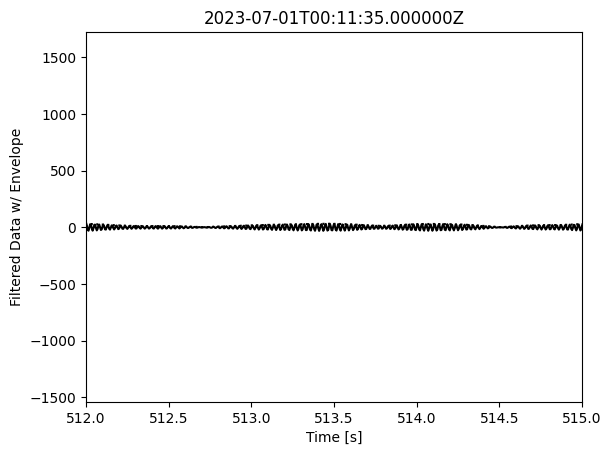

In [ ]:
data = st[0].data
npts = st[0].stats.npts
samprate = st[0].stats.sampling_rate

# Filtering the Stream object
st_filt = st.copy()
st_filt.filter('bandpass', freqmin=38, freqmax=40, corners=2, zerophase=True)

# Envelope of filtered data
data_envelope = obspy.signal.filter.envelope(st_filt[0].data)

# The plotting, plain matplotlib
t = np.arange(0, npts / samprate, 1 / samprate)
plt.plot(t, st_filt[0].data, 'k')
plt.plot(t, data_envelope, 'k:')
plt.title(st[0].stats.starttime)
plt.ylabel('Filtered Data w/ Envelope')
plt.xlabel('Time [s]')
plt.xlim(512, 515)
plt.show()

###PRUEBA DE DATOS MSEED

Centrado de datos a 0

In [ ]:
plt.plot(data-np.mean(tr))


Guardar archivo como csv separado por ;

In [ ]:
np.savetxt('text.csv', st, delimiter=';')

Lee el archivo, toma la traza [n] centra la traza a 0 y luego genera un csv

Primero toma el archivo, lee la cantidad de trazas y las muestra, luego con la data de la traza 0, o la primera, determina el promedio para centrar los datos restandoles la media a cada uno, centrando los datos a 0, finalmente normaliza los datos restandoles el máximo valor absoluto, para que no queden datos con valores muy grandes, finalmente mostrando el resultado de los valores

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:

file_path = '/content/drive/MyDrive/SEMINARIO BIG DATA/DATOS SENSOR/KMI..C01..2023182_010000.mseed'

# Verificar si el archivo existe
if os.path.exists(file_path):
    dat = obspy.read(file_path)
    print(f'Caracteristicas del archivo mseed: {dat}')  # Imprimir información sobre los datos leídos

else:
    print(f"El archivo {file_path} no existe.")



#np.savetxt('texttraza0.csv', dat, delimiter=';')
cantidad_trazas = len(dat)
print(f'Cantidad de trazas en el archivo MSEED: {cantidad_trazas}')
datx = dat[0].data

print(f'Muestra de la data original en la traza 0 :{datx}');
datx = datx - np.mean(datx)
max_abs = np.max(np.abs(datx))
datxc = datx
print(f'Muestra de la data centrada en la traza 0 :{datx}')
data_normalized = datx / max_abs
print(f'Muestra de la data centrada y normalizada en la traza 0 :{data_normalized}')
#np.savetxt('texttraza0.csv', data_normalized, delimiter=';')

data = {
    'Nombre': ['Dato1', 'Dato2', 'Dato3'],
    'Edad': [25, 30, 21],


}
df = pd.DataFrame(data)
print(df)

Caracteristicas del archivo mseed: 1 Trace(s) in Stream:
.KMI..C01 | 2023-07-01T01:00:00.000000Z - 2023-07-01T01:59:59.995000Z | 200.0 Hz, 720000 samples
Cantidad de trazas en el archivo MSEED: 1
Muestra de la data original en la traza 0 :[-73715 -73761 -73807 ... -74040 -74010 -73940]
Muestra de la data centrada en la traza 0 :[ 199.78467083  153.78467083  107.78467083 ... -125.21532917  -95.21532917
  -25.21532917]
Muestra de la data centrada y normalizada en la traza 0 :[ 0.08009921  0.06165653  0.04321386 ... -0.05020229 -0.03817446
 -0.01010952]


Grafico de la data normalizada vs la data original

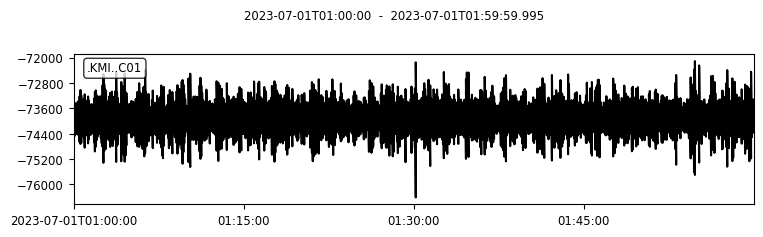

In [ ]:
 dat.plot();


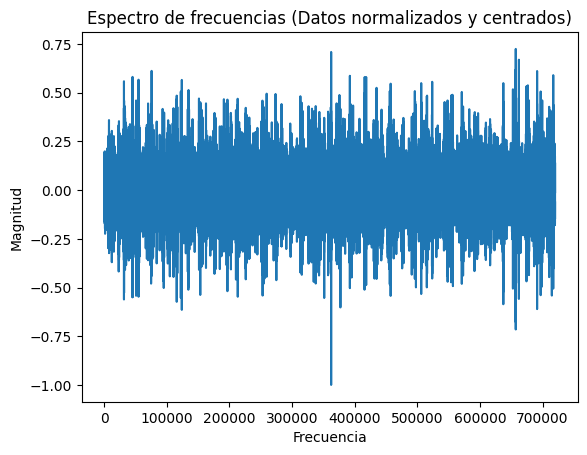

In [ ]:
plt.plot(data_normalized);
plt.title('Espectro de frecuencias (Datos normalizados y centrados)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
print();

Text(0, 0.5, 'Magnitud')

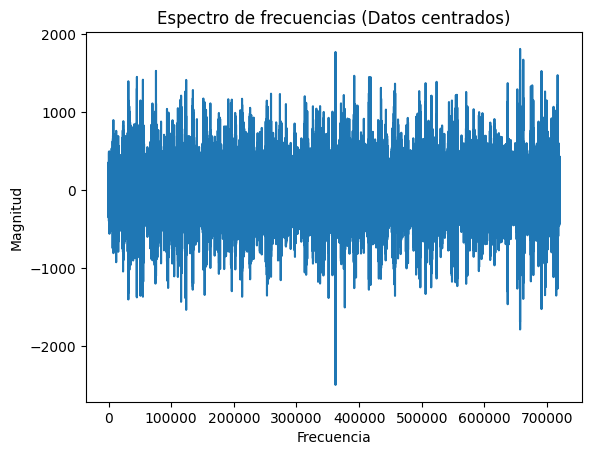

In [ ]:
plt.plot(datx);
plt.title('Espectro de frecuencias (Datos centrados)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

In [ ]:
min_length = min(len(dat[0].data), len(datxc), len(data_normalized))

datos = {
    'Producto': ['Producto A', 'Producto B', 'Producto C'],
    'Precio': dat[0].data[:min_length],  # Truncate to the shortest length
    'Stock': datxc[:min_length],         # Truncate to the shortest length
    'N': data_normalized[:min_length]     # Truncate to the shortest length
}

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(datos)

# Mostrar el DataFrame
print("Tabla Comparativa de Productos:")
print(df)

ValueError: All arrays must be of the same length

Dado que la data es de una hora aprox, se realizará un análisis del primer segundo para analizarlo
#Comportamiento del sensor en la traza 0 durante el primer segundo registrado

Text(0, 0.5, 'Magnitud')

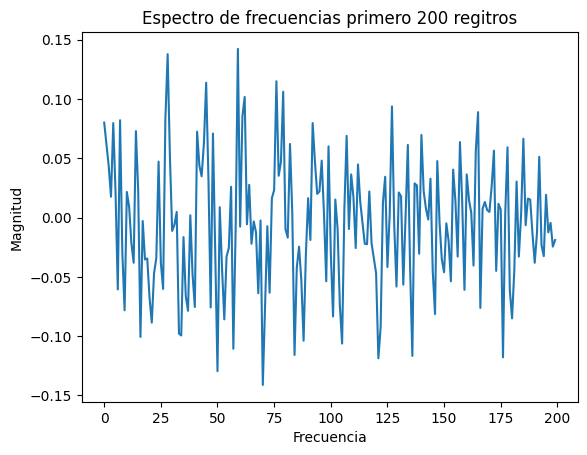

In [ ]:
primeros_200_registros = data_normalized[:200]
plt.plot(primeros_200_registros)
plt.title('Espectro de frecuencias primero 200 regitros')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

Ahora la data en 0.5 segundos
#Podemos ver un comportamiento senoidal de oscilaciones en los datos

Text(0, 0.5, 'Magnitud')

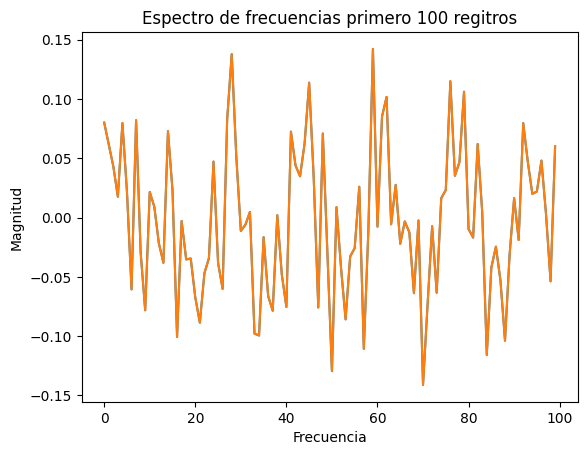

In [ ]:
primeros_100_registros = data_normalized[:100]
plt.plot(primeros_100_registros)
primeros_200_registros = data_normalized[:200]
plt.plot(primeros_100_registros)
plt.title('Espectro de frecuencias primero 100 regitros')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

Tomemos un periodo de 10 registros

Text(0, 0.5, 'Magnitud')

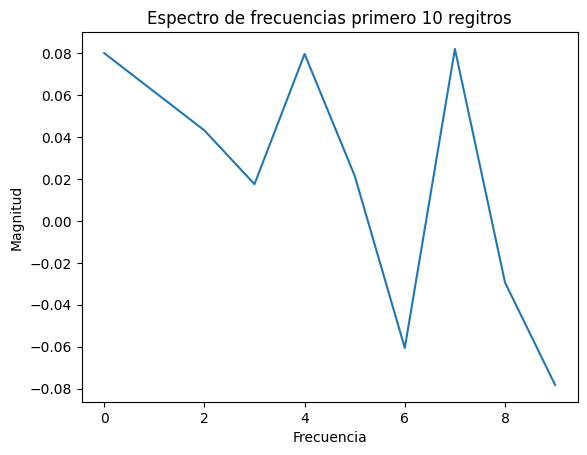

In [ ]:
primeros_10_registros = data_normalized[:10]
plt.plot(primeros_10_registros)
plt.title('Espectro de frecuencias primero 10 regitros')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

Dado que cada registro muestra un 1/200 segundos, por que el archivo es de 200 Hz, podemos ver un registro de 3, muestras: donde podemos ver un comportamiento decreciente

Text(0, 0.5, 'Magnitud')

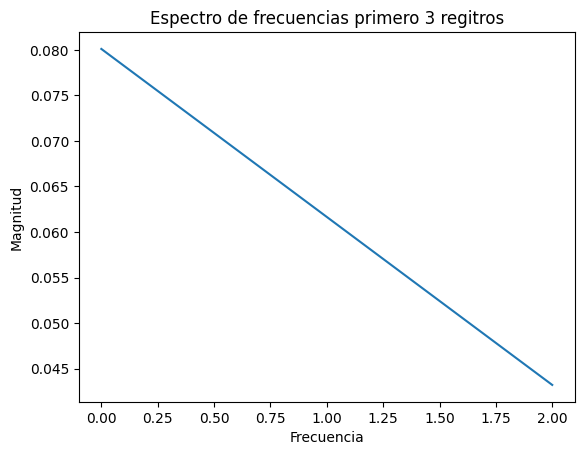

In [ ]:
primeros_3_registros = data_normalized[:3]
plt.plot(primeros_3_registros)
plt.title('Espectro de frecuencias primero 3 regitros')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

Analizando los datos con la transformada rapida de fourier para obtener las magnitudes y graficar el espectro de frecuencia, para transformar una señal del dominio del tiempo al dominio de la frecuencia.

Magnitud máxima: 2.9522826913468
Magnitud mínima: 0.01202783081684572


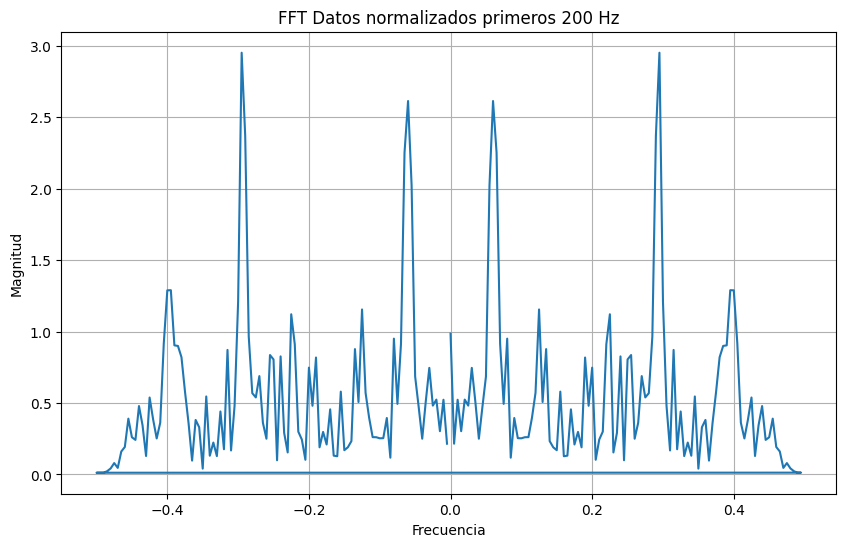

In [ ]:

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(primeros_200_registros)
frecuencias = np.fft.fftfreq(len(primeros_200_registros))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar magnitudes máximas y mínimas
magnitud_maxima = np.max(magnitudes)
magnitud_minima = np.min(magnitudes)

# Imprimir resultados
print(f"Magnitud máxima: {magnitud_maxima}")
print(f"Magnitud mínima: {magnitud_minima}")

# Graficar el espectro de frecuencias completo
plt.figure(figsize=(10, 6))
plt.plot(frecuencias, magnitudes)  # Mostrar el espectro completo
plt.title('FFT Datos normalizados primeros 200 Hz')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

Filtrado de dominio de la señal para después de calcular la Transformada de Fourier (FFT). Esto permitirá eliminar componentes de frecuencia no deseadas y enfocarte en las componentes más significativas que representen la señal senosoidal deseada.

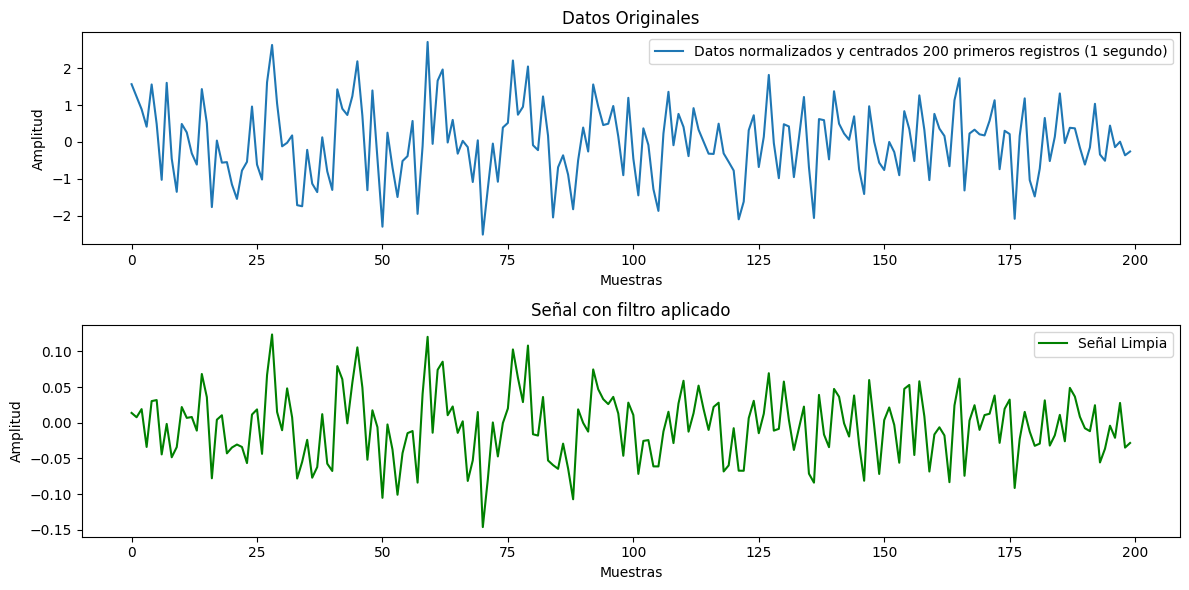

In [ ]:
# Normalizar los datos
datos_normalizados = (primeros_200_registros - np.mean(primeros_200_registros)) / np.std(primeros_200_registros)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(primeros_200_registros)
frecuencias = np.fft.fftfreq(len(primeros_200_registros))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.3 * np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(datos_normalizados, label='Datos normalizados y centrados 200 primeros registros (1 segundo)')
plt.title('Datos Originales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal con filtro aplicado')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

Podemos ver con la grafica filtrada, que hay un ciclo que puede repetirse cada 50 registros vamos a ver si es congruente con el analisis

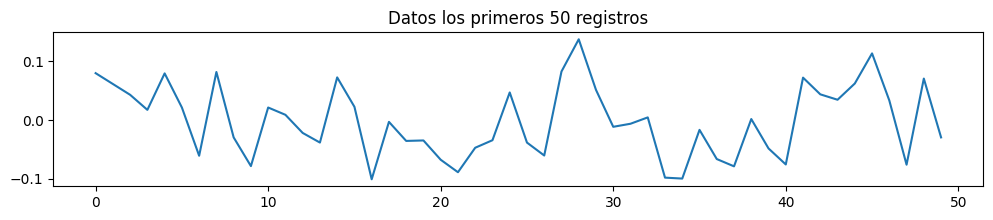

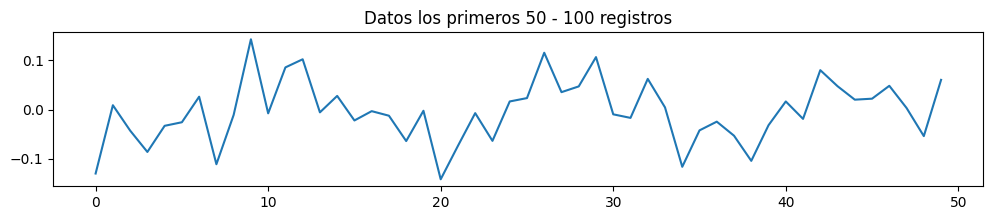

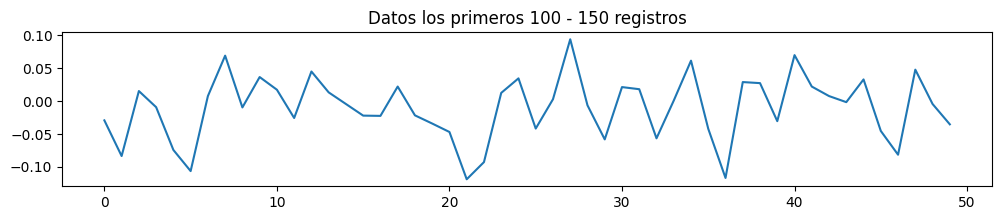

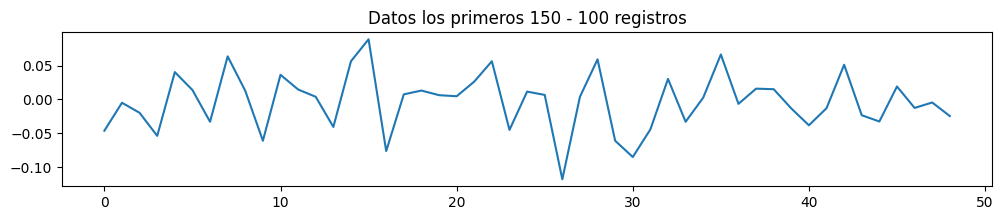

In [ ]:
primeros_25_registros = data_normalized[:50]
plt.figure(figsize=(12, 2))
plt.plot(primeros_25_registros)
plt.title('Datos los primeros 50 registros')
plt.show()
primeros_25_registros = data_normalized[50:100]
plt.figure(figsize=(12, 2))
plt.plot(primeros_25_registros)
plt.title('Datos los primeros 50 - 100 registros')
plt.show()
primeros_25_registros = data_normalized[100:150]
plt.figure(figsize=(12, 2))
plt.plot(primeros_25_registros)
plt.title('Datos los primeros 100 - 150 registros')
plt.show()
primeros_25_registros = data_normalized[150:199]
plt.figure(figsize=(12, 2))
plt.plot(primeros_25_registros)
plt.title('Datos los primeros 150 - 100 registros')
plt.show()

#Veamos si este fenómeno actua en todo el registro: tomemos los datos de: 200 a 400

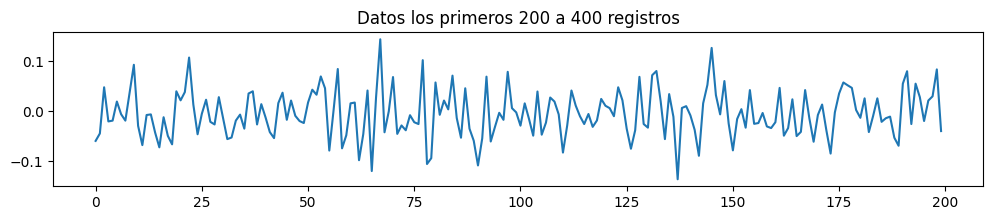

In [ ]:
pr = data_normalized[200:400]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 200 a 400 registros')
plt.show()

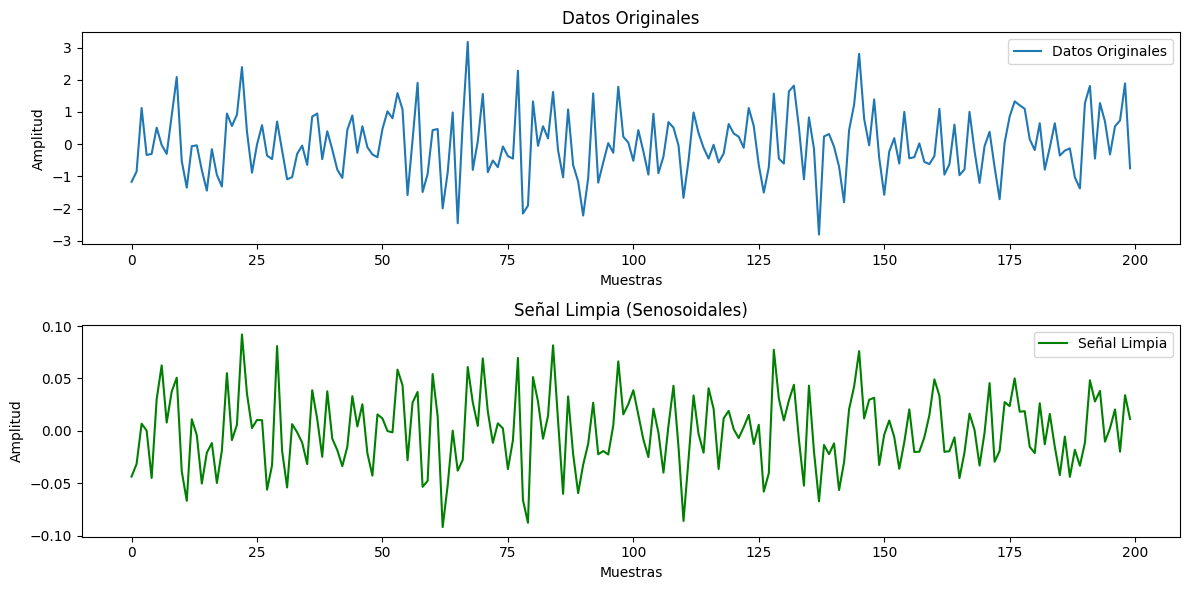

In [ ]:
datos_normalizados = (pr - np.mean(pr)) / np.std(pr)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(pr)
frecuencias = np.fft.fftfreq(len(pr))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.5 * np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(datos_normalizados, label='Datos Originales')
plt.title('Datos Originales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal Limpia (Senosoidales)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

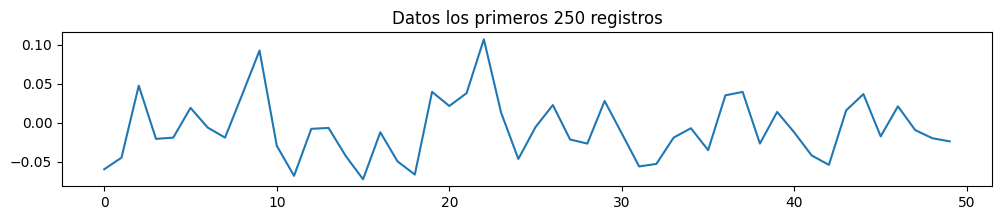

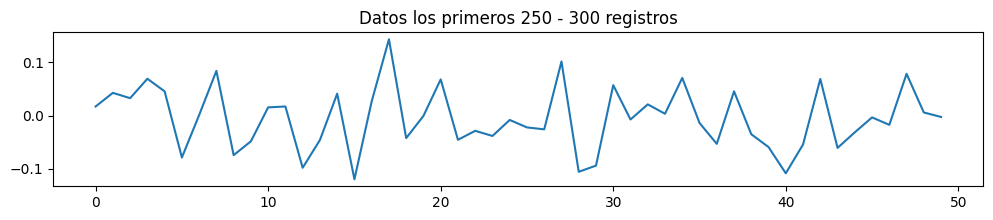

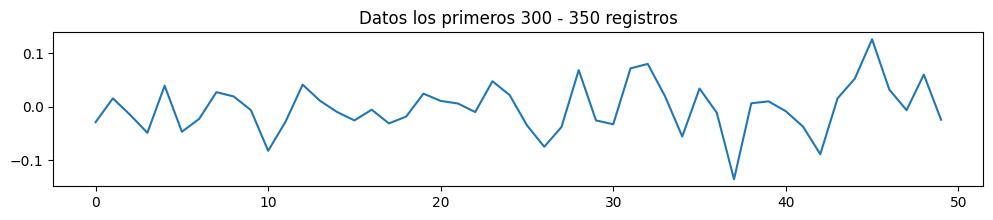

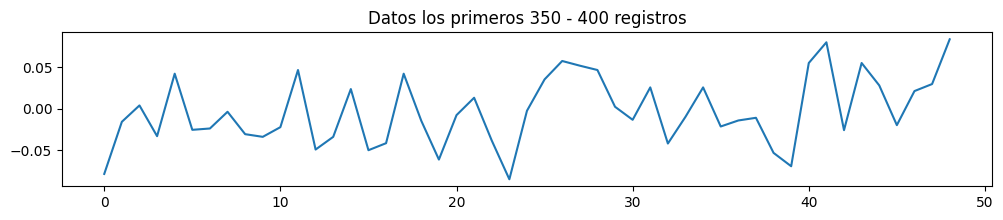

In [ ]:
pr = data_normalized[200:250]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 250 registros')
plt.show()
pr = data_normalized[250:300]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 250 - 300 registros')
plt.show()
pr = data_normalized[300:350]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 300 - 350 registros')
plt.show()
pr = data_normalized[350:399]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 350 - 400 registros')
plt.show()

#Veamos si este fenómeno en un momento aleatorio: tomemos los datos de: 1000 a 1200

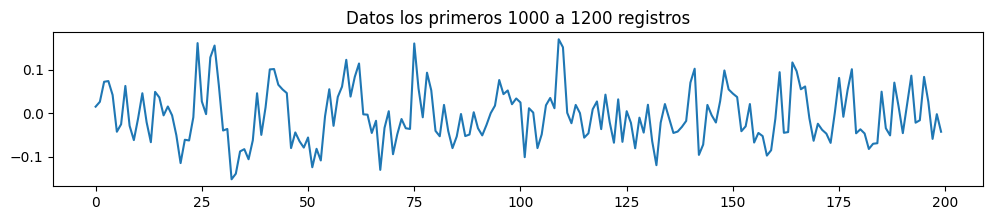

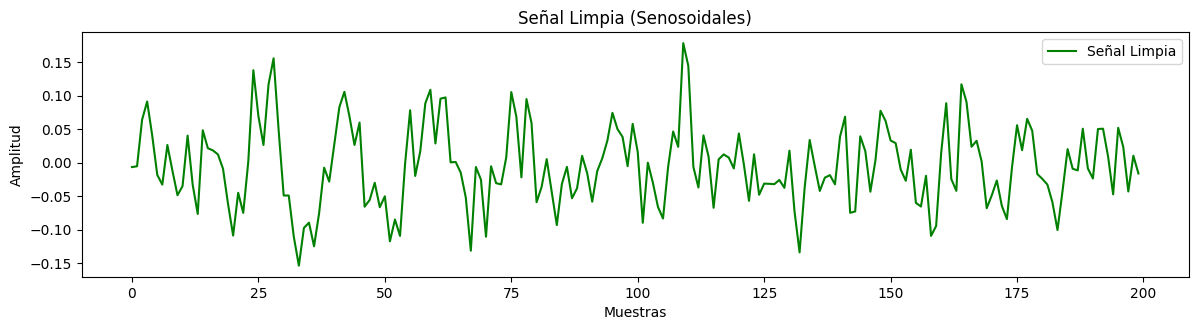

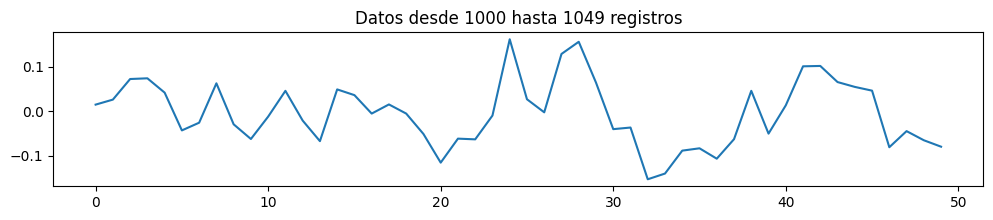

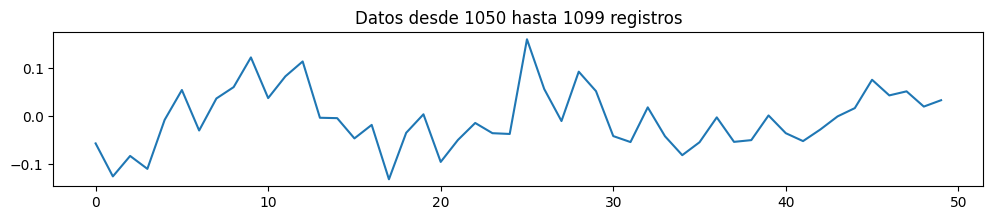

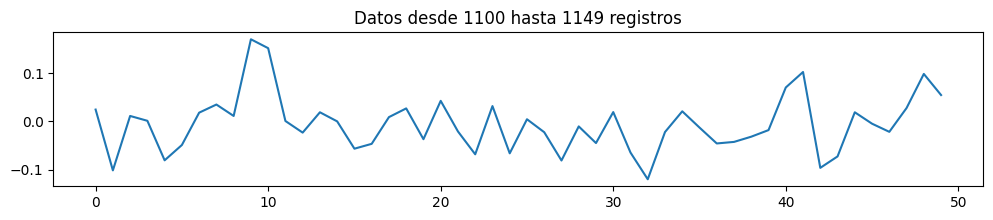

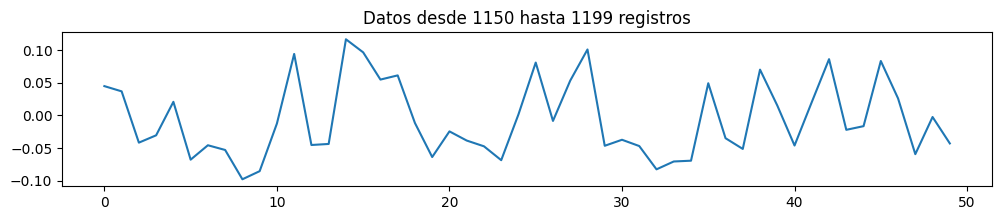

In [ ]:
pr = data_normalized[1000:1200]
plt.figure(figsize=(12, 2))
plt.plot(pr)
plt.title('Datos los primeros 1000 a 1200 registros')
plt.show()

datos_normalizados = (pr - np.mean(pr)) / np.std(pr)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(pr)
frecuencias = np.fft.fftfreq(len(pr))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.2 * np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal Limpia (Senosoidales)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


inicio = 1000
fin = 1200
paso = 50

# Iterar sobre los segmentos y graficar cada uno
for i in range(inicio, fin, paso):
    pr = data_normalized[i:i+paso]
    plt.figure(figsize=(12, 2))
    plt.plot(pr)
    plt.title(f'Datos desde {i} hasta {i+paso-1} registros')
    plt.show()

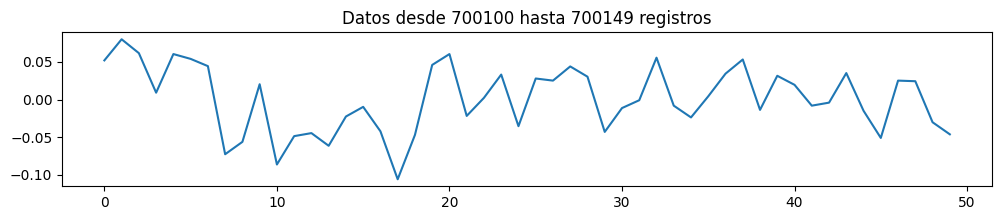

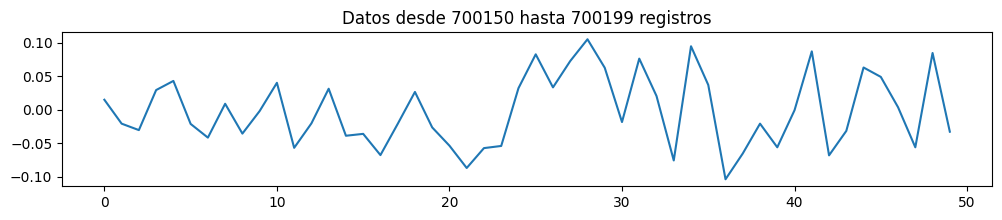

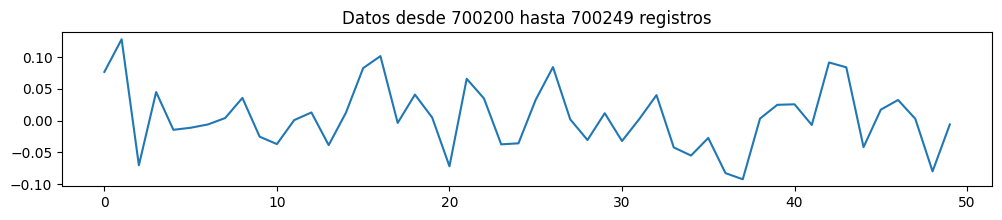

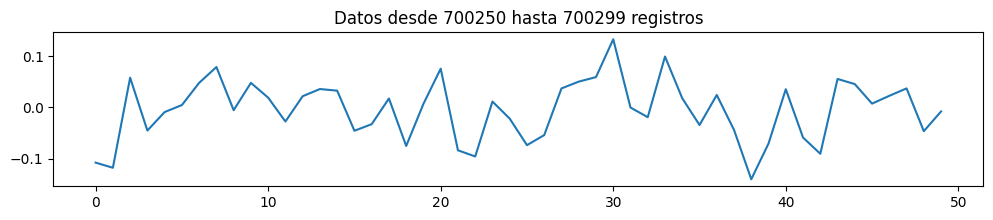

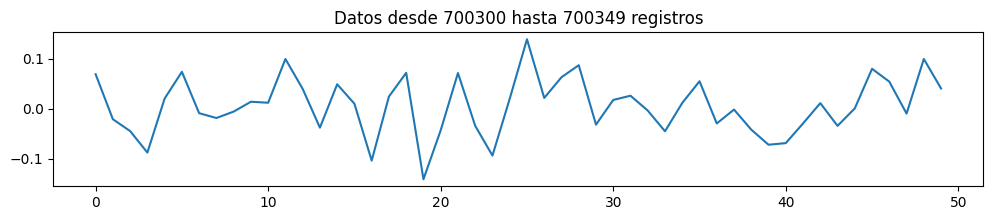

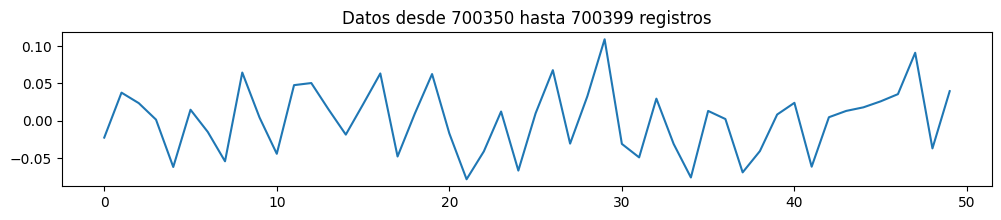

In [ ]:
##mas datoa aletatorios en el periodo de tiempo

inicio = 700100
fin = 700400
paso = 50
pr = data_normalized
# Iterar sobre los segmentos y graficar cada uno
for i in range(inicio, fin, paso):
    pr = data_normalized[i:i+paso]
    plt.figure(figsize=(12, 2))
    plt.plot(pr)
    plt.title(f'Datos desde {i} hasta {i+paso-1} registros')
    plt.show()

##Se confirma entonces que el rango de frecuencia 200Hz, tiene un intervalo de 50Hz en donde las señal es similar, entonces podemos entender que hay un periodo de tiempo de 0.25 segundos en donde hay un comportamiento oscilatorio encontrando un patrón oscilatorio representable

#Exploremos un momento la señal en ese periodo de tiempo,

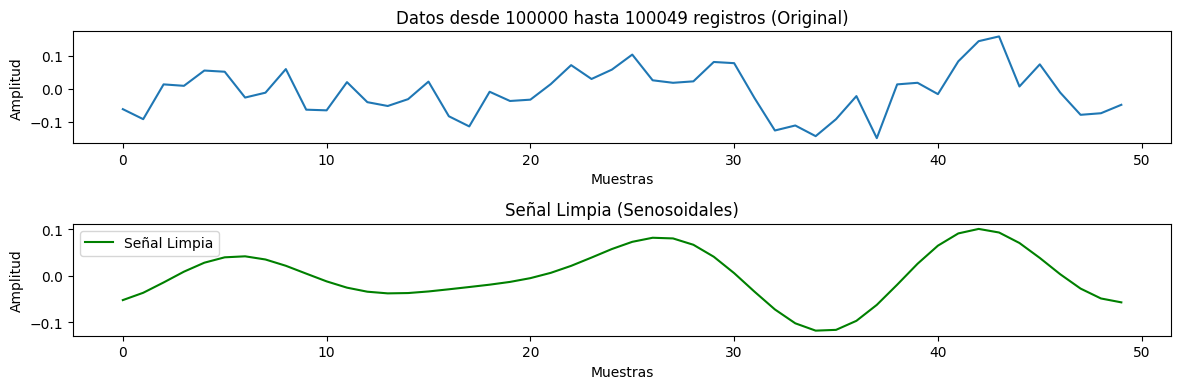

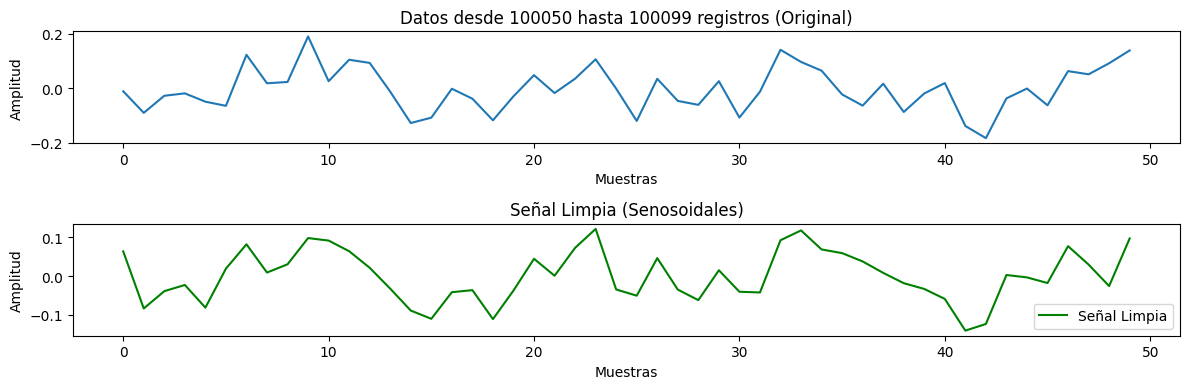

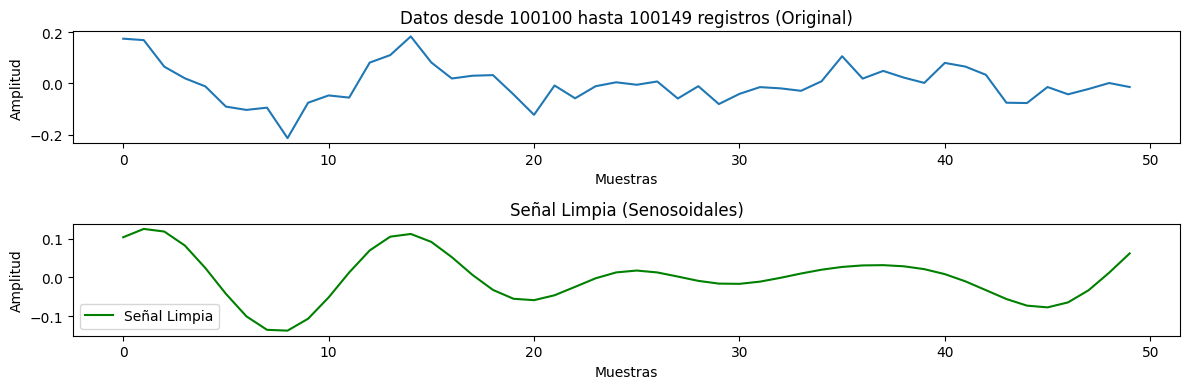

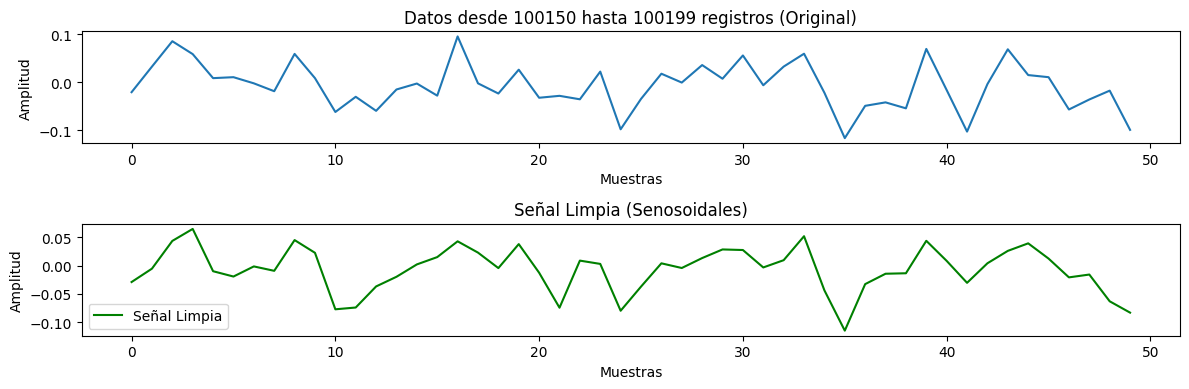

In [ ]:
inicio = 100000
fin = 100200
paso = 50
pr = data_normalized

# Iterar sobre los segmentos y graficar cada uno
for i in range(inicio, fin, paso):
    # Seleccionar el segmento actual
    pr_segmento = pr[i:i+paso]

    # Graficar el segmento original
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    plt.plot(pr_segmento)
    plt.title(f'Datos desde {i} hasta {i+paso-1} registros (Original)')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')

    # Aplicar la Transformada de Fourier (FFT) al segmento actual
    transformada = np.fft.fft(pr_segmento)
    frecuencias = np.fft.fftfreq(len(pr_segmento))

    # Calcular la magnitud (amplitud) de la Transformada de Fourier
    magnitudes = np.abs(transformada)

    # Encontrar las frecuencias más importantes
    umbral = 0.4 * np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
    indices_interesantes = np.where(magnitudes > umbral)[0]

    # Filtrar la FFT manteniendo solo las frecuencias importantes
    transformada_filtrada = np.zeros_like(transformada)
    transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

    # Obtener la señal limpia en el dominio de tiempo
    datos_limpios = np.fft.ifft(transformada_filtrada).real

    # Graficar la señal limpia (transformada) en la segunda subfigura
    plt.subplot(2, 1, 2)
    plt.plot(datos_limpios, label='Señal Limpia', color='green')
    plt.title('Señal Limpia (Senosoidales)')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.tight_layout()


Ecuación de la función senoidal ajustada:
y(t) = 1.00 * sin(2π * 0.50 * t + -0.00) + -0.00


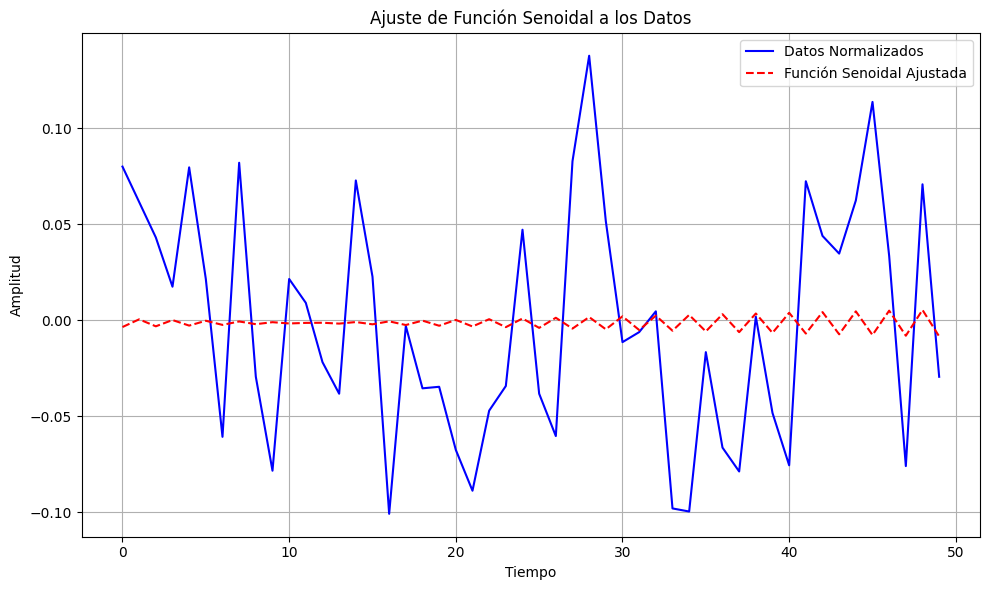

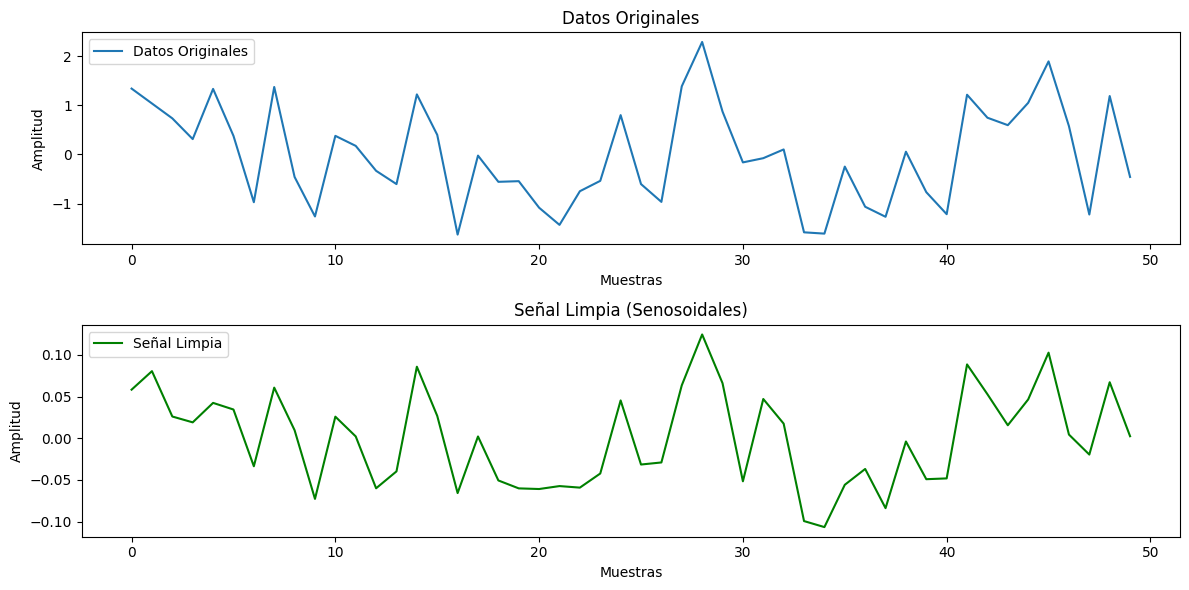

Ecuación de la función senoidal ajustada:
y(t) = -2.42 * sin(2π * 1.00 * t + 6.09) + -0.46


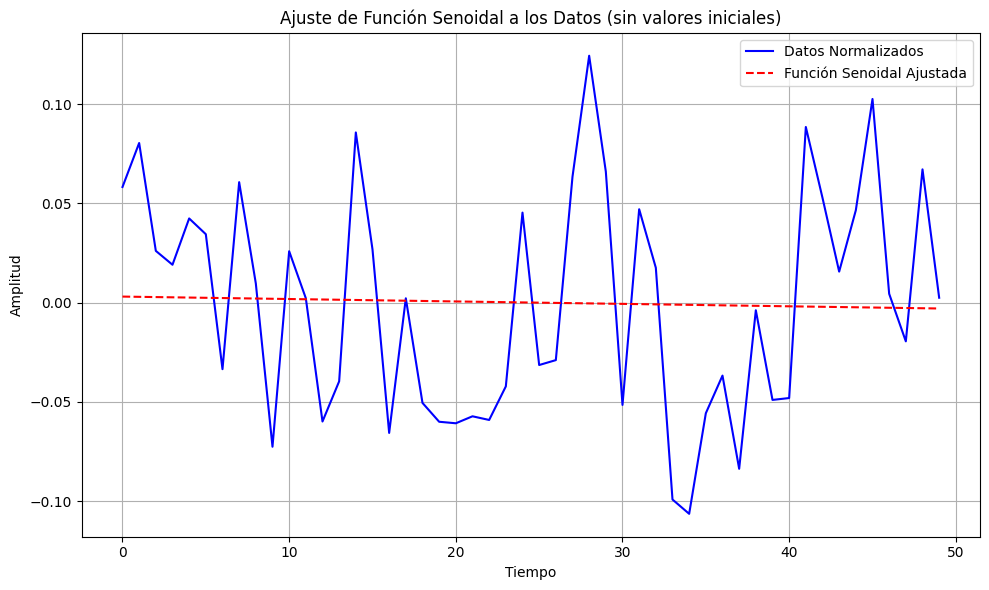

In [ ]:
from scipy.optimize import curve_fit

pr = data_normalized[0:50]

def senoidal(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Generar datos de tiempo (asumiendo intervalo de muestreo constante)
n_puntos = len(pr)
intervalo_muestreo = 1  # supongamos que es de 1 segundo entre cada punto
tiempo = np.linspace(0, (n_puntos - 1) * intervalo_muestreo, n_puntos)

# Ajuste de curva
parametros_iniciales = (1.0, 0.5, 0.0, 0.0)  # Valores iniciales para A, f, phi, C
params_opt, params_cov = curve_fit(senoidal, tiempo, pr, p0=parametros_iniciales)

# Parámetros optimizados
A_opt, f_opt, phi_opt, C_opt = params_opt

# Construir la ecuación de la función senoidal ajustada
ecuacion_senoidal = f'y(t) = {A_opt:.2f} * sin(2π * {f_opt:.2f} * t + {phi_opt:.2f}) + {C_opt:.2f}'
print("Ecuación de la función senoidal ajustada:")
print(ecuacion_senoidal)

funcion_ajustada = senoidal(tiempo, A_opt, f_opt, phi_opt, C_opt)

# Graficar los datos originales y la función ajustada
plt.figure(figsize=(10, 6))
plt.plot(tiempo, pr, label='Datos Normalizados', color='blue')
plt.plot(tiempo, funcion_ajustada, label='Función Senoidal Ajustada', color='red', linestyle='--')
plt.title('Ajuste de Función Senoidal a los Datos')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#transformada de fourier

datos_normalizados = (pr - np.mean(pr)) / np.std(pr)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(pr)
frecuencias = np.fft.fftfreq(len(pr))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.4 * np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(datos_normalizados, label='Datos Originales')
plt.title('Datos Originales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal Limpia (Senosoidales)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


def senoidal(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Generar datos de tiempo (asumiendo intervalo de muestreo constante)
n_puntos = len(datos_limpios)
intervalo_muestreo = 1  # supongamos que es de 1 segundo entre cada punto
tiempo = np.linspace(0, (n_puntos - 1) * intervalo_muestreo, n_puntos)

# Ajuste de curva sin valores iniciales
params_opt, params_cov = curve_fit(senoidal, tiempo, datos_limpios)

# Parámetros optimizados
A_opt, f_opt, phi_opt, C_opt = params_opt

# Construir la ecuación de la función senoidal ajustada
ecuacion_senoidal = f'y(t) = {A_opt:.2f} * sin(2π * {f_opt:.2f} * t + {phi_opt:.2f}) + {C_opt:.2f}'
print("Ecuación de la función senoidal ajustada:")
print(ecuacion_senoidal)

# Generar la función ajustada
funcion_ajustada = senoidal(tiempo, A_opt, f_opt, phi_opt, C_opt)

# Graficar los datos originales y la función ajustada
plt.figure(figsize=(10, 6))
plt.plot(tiempo, datos_limpios, label='Datos Normalizados', color='blue')
plt.plot(tiempo, funcion_ajustada, label='Función Senoidal Ajustada', color='red', linestyle='--')
plt.title('Ajuste de Función Senoidal a los Datos (sin valores iniciales)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

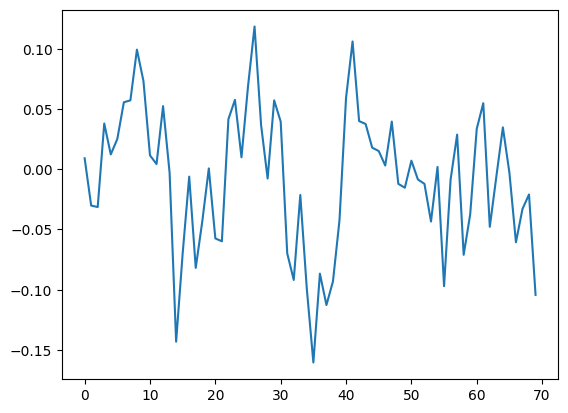

In [ ]:
primeros_10_registros = data_normalized[10080:10150]
plt.plot(primeros_10_registros)

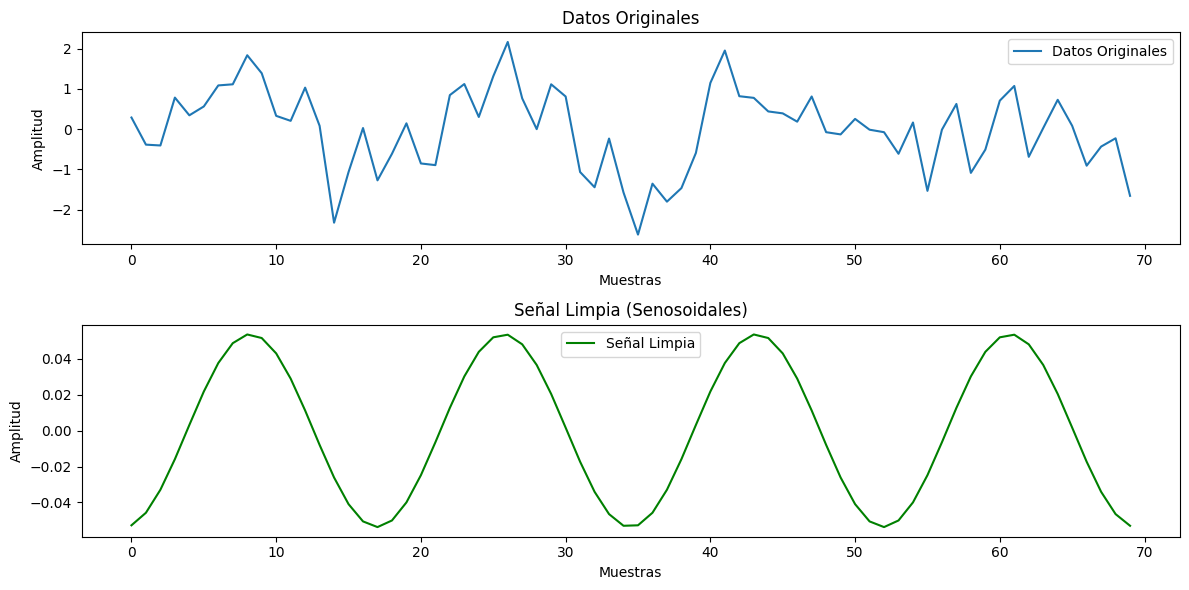

In [ ]:
#transformada de fourier

datos_normalizados = (primeros_10_registros - np.mean(primeros_10_registros)) / np.std(primeros_10_registros)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(primeros_10_registros)
frecuencias = np.fft.fftfreq(len(primeros_10_registros))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.7* np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(datos_normalizados, label='Datos Originales')
plt.title('Datos Originales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal Limpia (Senosoidales)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


Ecuación de la función senoidal ajustada:
y(t) = 0.05 * sin(2π * 1.14 * t + -1.38) + -0.00


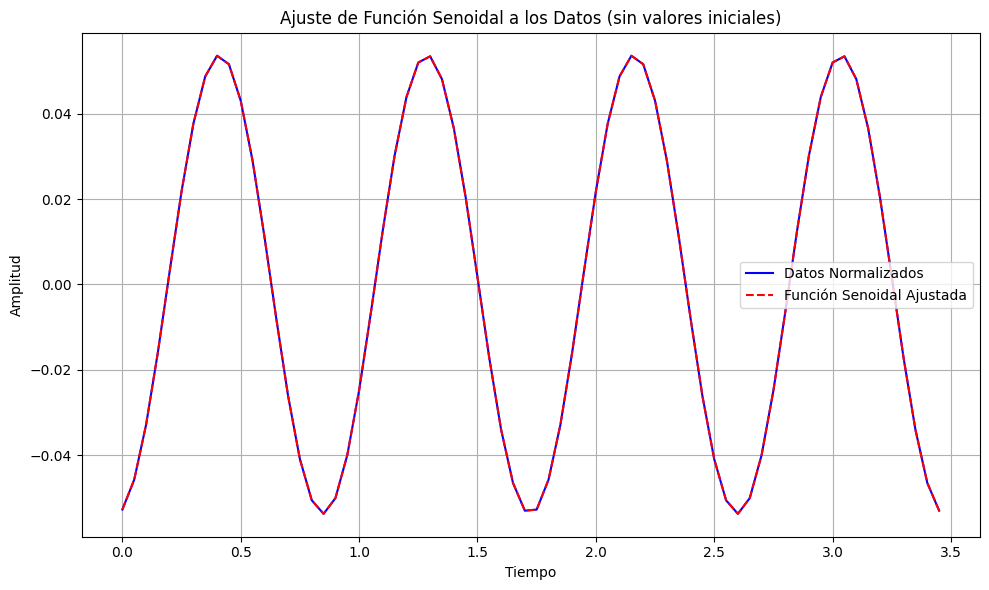

In [ ]:
def senoidal(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Generar datos de tiempo (asumiendo intervalo de muestreo constante)
n_puntos = len(datos_limpios)
intervalo_muestreo = 0.05# supongamos que es de 1 segundo entre cada punto
tiempo = np.linspace(0, (n_puntos - 1) * intervalo_muestreo, n_puntos)

# Ajuste de curva sin valores iniciales
params_opt, params_cov = curve_fit(senoidal, tiempo, datos_limpios)

# Parámetros optimizados
A_opt, f_opt, phi_opt, C_opt = params_opt

# Construir la ecuación de la función senoidal ajustada
ecuacion_senoidal = f'y(t) = {A_opt:.2f} * sin(2π * {f_opt:.2f} * t + {phi_opt:.2f}) + {C_opt:.2f}'
print("Ecuación de la función senoidal ajustada:")
print(ecuacion_senoidal)

# Generar la función ajustada
funcion_ajustada = senoidal(tiempo, A_opt, f_opt, phi_opt, C_opt)

# Graficar los datos originales y la función ajustada
plt.figure(figsize=(10, 6))
plt.plot(tiempo, datos_limpios, label='Datos Normalizados', color='blue')
plt.plot(tiempo, funcion_ajustada, label='Función Senoidal Ajustada', color='red', linestyle='--')
plt.title('Ajuste de Función Senoidal a los Datos (sin valores iniciales)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Frecuencias principales donde se produjeron los movimientos:
1. Frecuencia: 0.06 Hz, Magnitud: 0.7493019319873976
2. Frecuencia: -0.06 Hz, Magnitud: 0.7493019319873976
3. Frecuencia: 0.3 Hz, Magnitud: 0.8156940806476377
4. Frecuencia: -0.3 Hz, Magnitud: 0.8156940806476378


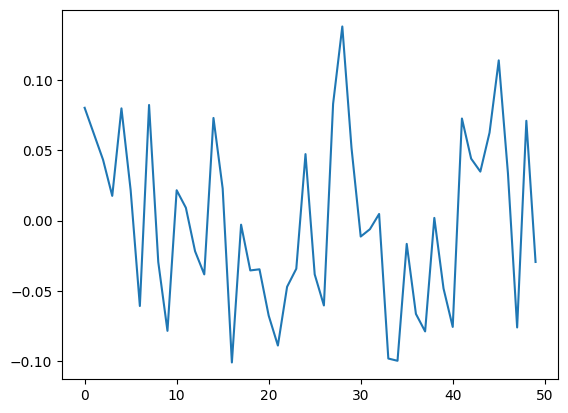

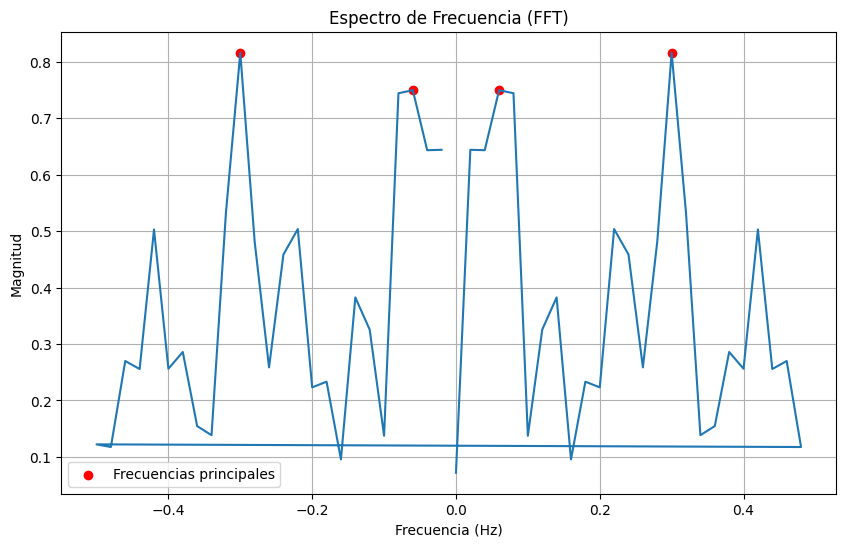

In [ ]:
pr = data_normalized[0:50]

plt.plot(pr)


fft_resultado = np.fft.fft(pr)

# Calcular las frecuencias correspondientes en ciclos por muestra
n = len(pr)
frecuencias_ciclos_por_muestra = np.fft.fftfreq(n)

# Calcular la frecuencia de muestreo
frecuencia_muestreo = 1  # Asumiendo que la frecuencia de muestreo es 1 Hz (porque los datos están normalizados en [0, 1])

# Convertir las frecuencias a Hz
frecuencias_hz = frecuencias_ciclos_por_muestra * frecuencia_muestreo

# Calcular las magnitudes de la FFT (amplitudes)
magnitudes = np.abs(fft_resultado)

# Encontrar las N frecuencias con las magnitudes más altas
N = 4  # Puedes ajustar esto según cuántas frecuencias principales quieras identificar
indices_mayores = np.argsort(magnitudes)[-N:]  # Índices de las N magnitudes más altas

# Imprimir resultados
print("Frecuencias principales donde se produjeron los movimientos:")
for i, indice in enumerate(indices_mayores, 1):
    print(f"{i}. Frecuencia: {frecuencias_hz[indice]} Hz, Magnitud: {magnitudes[indice]}")

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_hz, magnitudes)
plt.title('Espectro de Frecuencia (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Resaltar las N frecuencias más altas en la gráfica
plt.scatter(frecuencias_hz[indices_mayores], magnitudes[indices_mayores], color='red', label='Frecuencias principales')
plt.legend()

plt.show()

Frecuencias principales donde se produjeron los movimientos:
1. Frecuencia: 11.0 Hz, Magnitud: 11.722811582361944
2. Frecuencia: 12.0 Hz, Magnitud: 13.697721876162301
3. Frecuencia: -12.0 Hz, Magnitud: 13.697721876162303
4. Frecuencia: 10.0 Hz, Magnitud: 19.998818700601205
5. Frecuencia: -10.0 Hz, Magnitud: 19.99881870060121


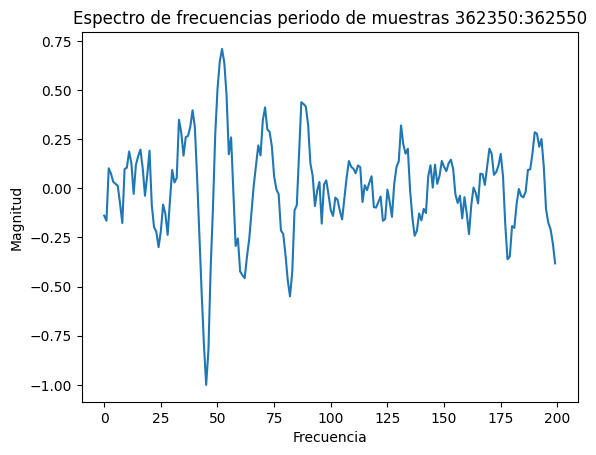

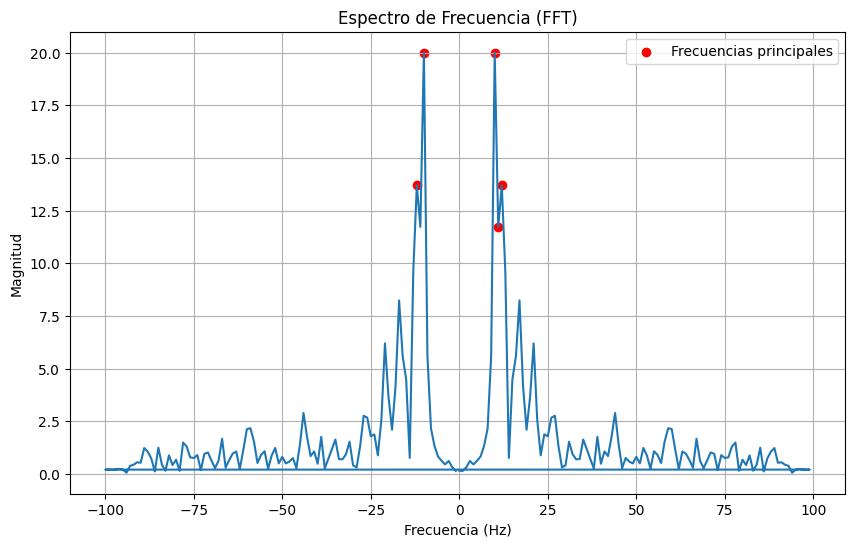

In [ ]:
datos_normalizados = data_normalized[362350:362550]
plt.title('Espectro de frecuencias periodo de muestras 362350:362550')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.plot(datos_normalizados)

# Calcular la FFT de los datos normalizados
fft_resultado = np.fft.fft(datos_normalizados)

# Calcular la frecuencia de muestreo y el periodo
frecuencia_muestreo = 200  # Frecuencia de muestreo de 200 Hz (200 muestras por segundo)
periodo = 1 / frecuencia_muestreo  # Periodo de la señal en segundos

# Calcular las frecuencias correspondientes en ciclos por muestra
n = len(datos_normalizados)
frecuencias_ciclos_por_muestra = np.fft.fftfreq(n)

# Convertir las frecuencias a Hz
frecuencias_hz = frecuencias_ciclos_por_muestra * frecuencia_muestreo

# Calcular las magnitudes de la FFT (amplitudes)
magnitudes = np.abs(fft_resultado)

# Encontrar las N frecuencias con las magnitudes más altas
N = 5 # Puedes ajustar esto según cuántas frecuencias principales quieras identificar
indices_mayores = np.argsort(magnitudes)[-N:]  # Índices de las N magnitudes más altas

# Imprimir resultados
print("Frecuencias principales donde se produjeron los movimientos:")
for i, indice in enumerate(indices_mayores, 1):
    print(f"{i}. Frecuencia: {frecuencias_hz[indice]} Hz, Magnitud: {magnitudes[indice]}")

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_hz, magnitudes)
plt.title('Espectro de Frecuencia (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Resaltar las N frecuencias más altas en la gráfica
plt.scatter(frecuencias_hz[indices_mayores], magnitudes[indices_mayores], color='red', label='Frecuencias principales')
plt.legend()

plt.show()





Ecuación de la función senoidal ajustada:
y(t) = 0.72 * sin(2π * 0.71 * t + 2.81) + 0.02


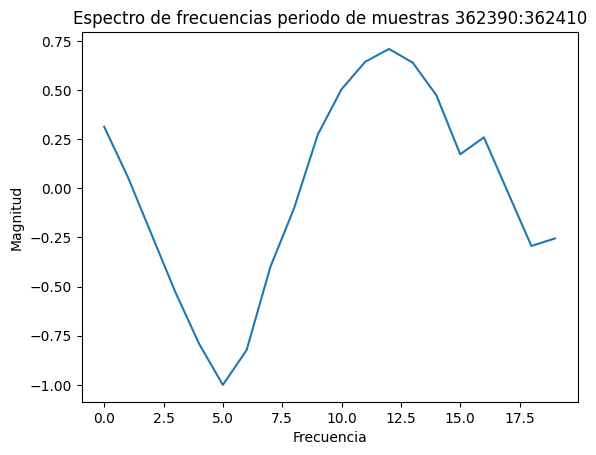

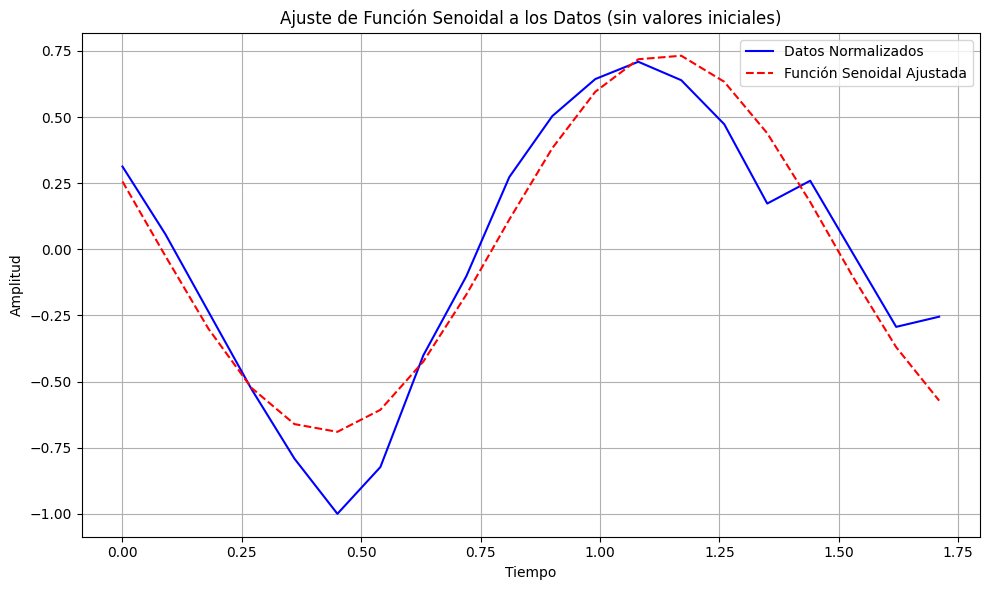

In [ ]:
datos_normalizados = data_normalized[362390:362410]
plt.plot(datos_normalizados)
plt.title('Espectro de frecuencias periodo de muestras 362390:362410')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

def senoidal(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Generar datos de tiempo (asumiendo intervalo de muestreo constante)
n_puntos = len(datos_normalizados)
intervalo_muestreo = 0.09
tiempo = np.linspace(0, (n_puntos - 1) * intervalo_muestreo, n_puntos)

# Ajuste de curva sin valores iniciales
params_opt, params_cov = curve_fit(senoidal, tiempo, datos_normalizados)

# Parámetros optimizados
A_opt, f_opt, phi_opt, C_opt = params_opt

# Construir la ecuación de la función senoidal ajustada
ecuacion_senoidal = f'y(t) = {A_opt:.2f} * sin(2π * {f_opt:.2f} * t + {phi_opt:.2f}) + {C_opt:.2f}'
print("Ecuación de la función senoidal ajustada:")
print(ecuacion_senoidal)

# Generar la función ajustada
funcion_ajustada = senoidal(tiempo, A_opt, f_opt, phi_opt, C_opt)

# Graficar los datos originales y la función ajustada
plt.figure(figsize=(10, 6))
plt.plot(tiempo, datos_normalizados, label='Datos Normalizados', color='blue')
plt.plot(tiempo, funcion_ajustada, label='Función Senoidal Ajustada', color='red', linestyle='--')
plt.title('Ajuste de Función Senoidal a los Datos (sin valores iniciales)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

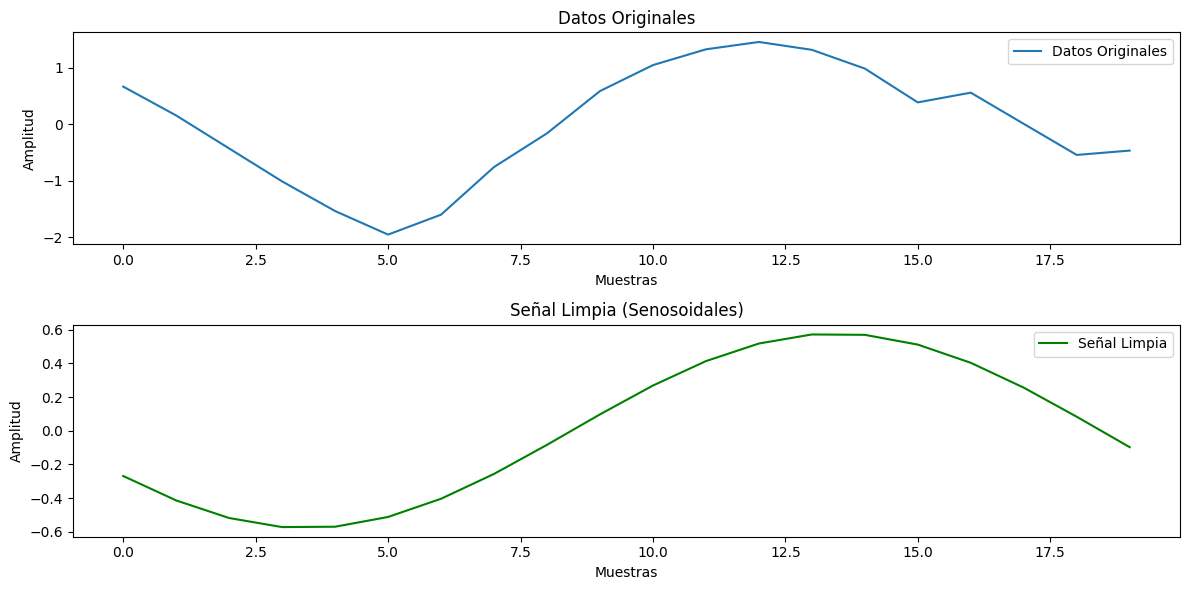

In [ ]:
dr = data_normalized[362390:362410]
datos_normalizados = (dr - np.mean(dr)) / np.std(dr)

# Aplicar la Transformada de Fourier (FFT)
transformada = np.fft.fft(dr)
frecuencias = np.fft.fftfreq(len(primeros_10_registros))

# Calcular la magnitud (amplitud) de la Transformada de Fourier
magnitudes = np.abs(transformada)

# Encontrar las frecuencias más importantes
umbral = 0.7* np.max(magnitudes)   # Umbral para eliminar componentes de baja magnitud
indices_interesantes = np.where(magnitudes > umbral)[0]

# Filtrar la FFT manteniendo solo las frecuencias importantes
transformada_filtrada = np.zeros_like(transformada)
transformada_filtrada[indices_interesantes] = transformada[indices_interesantes]

# Obtener la señal limpia en el dominio de tiempo
datos_limpios = np.fft.ifft(transformada_filtrada).real

# Graficar los datos originales y la señal limpia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(datos_normalizados, label='Datos Originales')
plt.title('Datos Originales')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos_limpios, label='Señal Limpia', color='green')
plt.title('Señal Limpia (Senosoidales)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

Ecuación de la función senoidal ajustada:
y(t) = 0.58 * sin(2π * 1.06 * t + -0.48) + 0.00


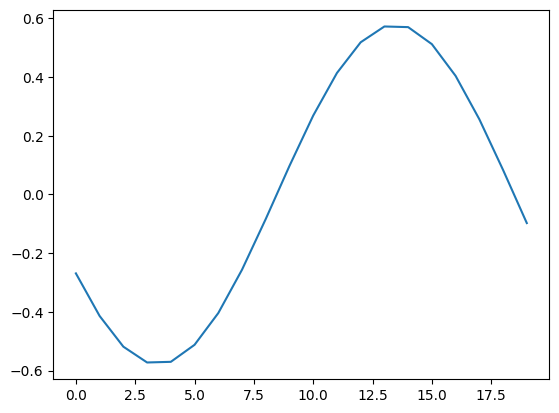

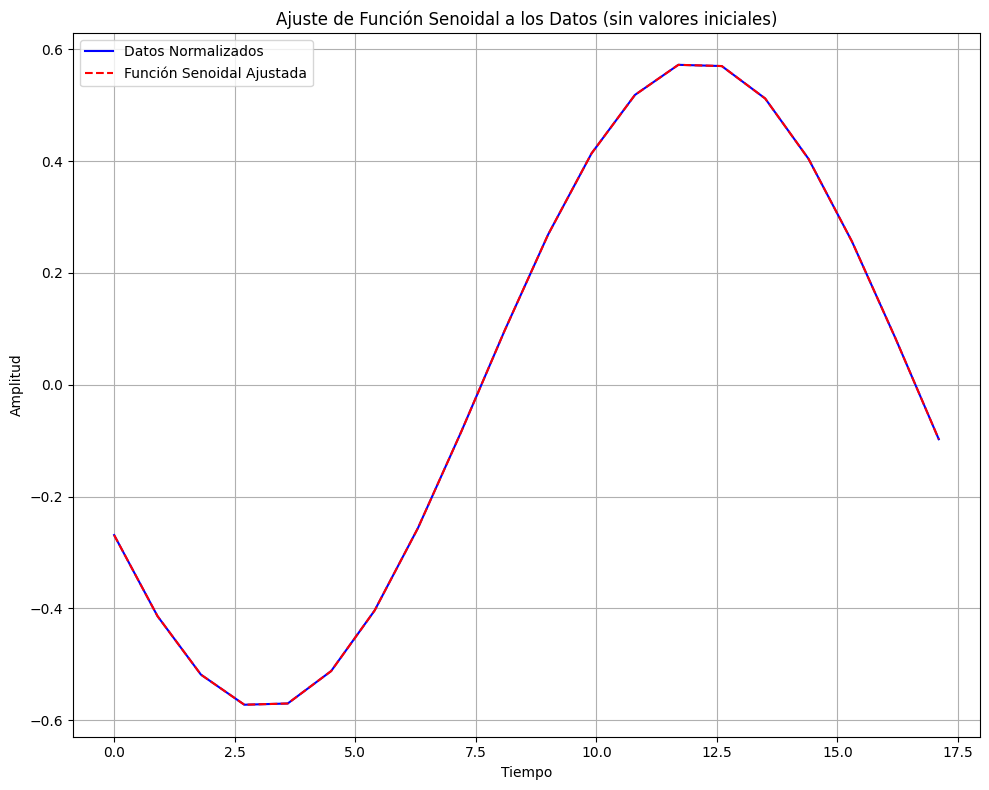

In [ ]:

plt.plot(datos_limpios)
def senoidal(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Generar datos de tiempo (asumiendo intervalo de muestreo constante)
n_puntos = len(datos_limpios)
intervalo_muestreo = 0.9
tiempo = np.linspace(0, (n_puntos - 1) * intervalo_muestreo, n_puntos)

# Ajuste de curva sin valores iniciales
params_opt, params_cov = curve_fit(senoidal, tiempo, datos_limpios)

# Parámetros optimizados
A_opt, f_opt, phi_opt, C_opt = params_opt

# Construir la ecuación de la función senoidal ajustada
ecuacion_senoidal = f'y(t) = {A_opt:.2f} * sin(2π * {f_opt:.2f} * t + {phi_opt:.2f}) + {C_opt:.2f}'
print("Ecuación de la función senoidal ajustada:")
print(ecuacion_senoidal)

# Generar la función ajustada
funcion_ajustada = senoidal(tiempo, A_opt, f_opt, phi_opt, C_opt)

# Graficar los datos originales y la función ajustada
plt.figure(figsize=(10, 8))
plt.plot(tiempo, datos_limpios, label='Datos Normalizados', color='blue')
plt.plot(tiempo, funcion_ajustada, label='Función Senoidal Ajustada', color='red', linestyle='--')
plt.title('Ajuste de Función Senoidal a los Datos (sin valores iniciales)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()